<a href="https://colab.research.google.com/github/TravisLeeTS/grabcvchallenge/blob/master/eval_ckpt_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisites (set up tensorflow/tpu and checkpoints)

In [0]:
from __future__ import print_function
from IPython import display
!git clone https://github.com/TravisLeeTS/tpu
display.clear_output()

# setup path
import sys
sys.path.append('/content/tpu/models/official/efficientnet')
sys.path.append('/content/tpu/models/common')

model_name = 'efficientnet-b0' #@param


# Inference example with pretrained model checkpoint.


--2019-06-17 15:57:10--  https://upload.wikimedia.org/wikipedia/commons/8/87/2014_Mercedes-Benz_C200_SE_Executive_Automatic_2.0_Front.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4778990 (4.6M) [image/jpeg]
Saving to: ‘2014_Mercedes-Benz_C200_SE_Executive_Automatic_2.0_Front.jpg.2’

2014_Mercedes-Benz_ 100%[===================>]   4.56M  16.7MB/s    in 0.3s    

2019-06-17 15:57:10 (16.7 MB/s) - ‘2014_Mercedes-Benz_C200_SE_Executive_Automatic_2.0_Front.jpg.2’ saved [4778990/4778990]



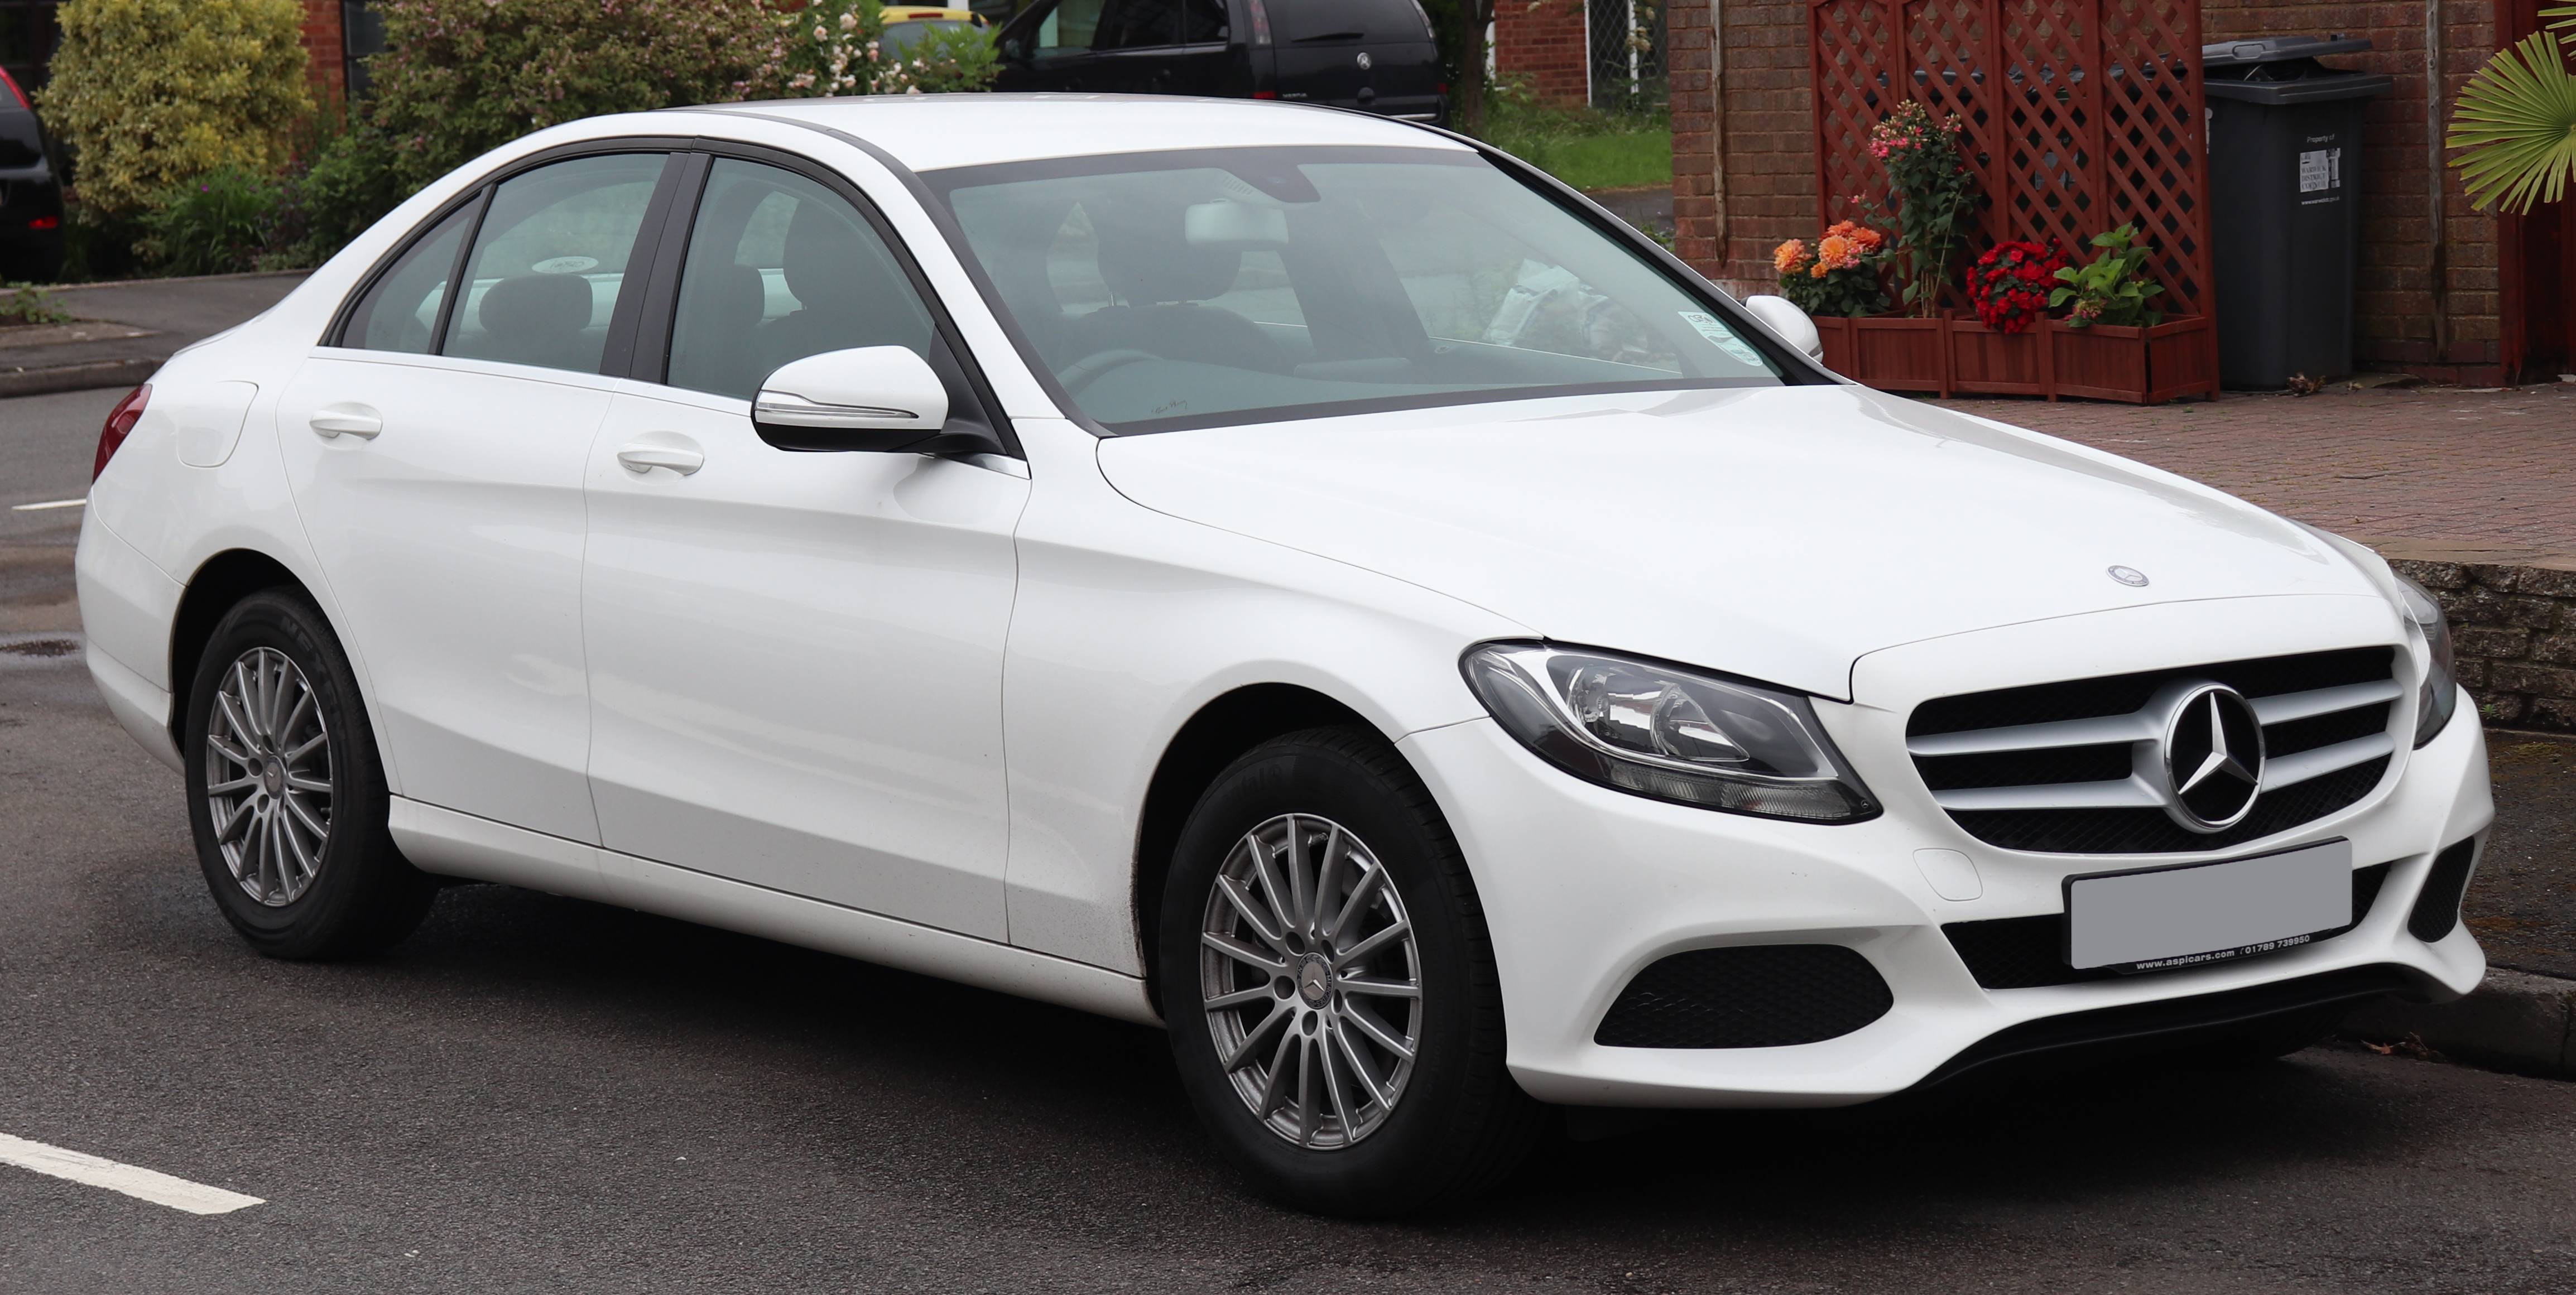

In [4]:
!wget https://upload.wikimedia.org/wikipedia/commons/8/87/2014_Mercedes-Benz_C200_SE_Executive_Automatic_2.0_Front.jpg
image_file = '2014_Mercedes-Benz_C200_SE_Executive_Automatic_2.0_Front.jpg'
display.display(display.Image(image_file))

In [6]:
import  eval_ckpt_main as eval_ckpt
import tensorflow as tf

ckpt_dir = 'gs://cloud-tpu-checkpoints/efficientnet/{}'.format(model_name)
labels_map_file = 'gs://cloud-tpu-checkpoints/efficientnet/eval_data/labels_map.txt'


image_files = [image_file]
pred_idx, pred_prob = eval_ckpt.eval_example_images(
    model_name, ckpt_dir, image_files, labels_map_file)

predicted class for image 2014_Mercedes-Benz_C200_SE_Executive_Automatic_2.0_Front.jpg: 
  -> top_0 (42.85%): beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon  
  -> top_1 (12.26%): convertible  
  -> top_2 (11.23%): sports car, sport car  
  -> top_3 (10.11%): car wheel  
  -> top_4 (5.40%): grille, radiator grille  
